In [767]:
import numpy as np
import pandas as pd
df = pd.read_csv("spam.csv", encoding='latin-1')

In [768]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1222,ham,Teach me apps da. When you come to college.,NaN,NaN,NaN
620,ham,Dear we got &lt;#&gt; dollars hi hi,NaN,NaN,NaN
1960,spam,Guess what! Somebody you know secretly fancies...,NaN,NaN,NaN
5386,ham,I'm at work. Please call,NaN,NaN,NaN
4490,ham,"My friend, she's studying at warwick, we've pl...",NaN,NaN,NaN


In [769]:
df.shape

(5572, 5)

In [770]:
# Steps for model


# DATA CLEANING
# EDA(Exploratory Data Analysis)
# TEXT PREPROCESSING(vectorization,Stemming,remove stop words)
# MODEL BUILDING
# MODEL EVALUATION
# IMPROVEMENT DEPENDING ON  EVALUATION
# CONVERTING ON WEBSITE
# DEPLOY IT ON RENDER

# data cleaning

In [771]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [772]:
# drop last 3 col
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [773]:
df.sample(5)

,v1,v2
3724,ham,Nothing spl..wat abt u and whr ru?
2975,ham,I love u 2 my little pocy bell I am sorry but ...
1083,ham,Wat makes some people dearer is not just de ha...
2585,ham,I will be outside office take all from there
3376,ham,Yup. Wun believe wat? U really neva c e msg i ...


In [774]:
# renaming the col
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2897,ham,If you r @ home then come down within 5 min
4780,ham,Yup... Hey then one day on fri we can ask miwa...
163,spam,-PLS STOP bootydelious (32/F) is inviting you ...
4176,ham,Ok lor then we go tog lor...
271,ham,"Night has ended for another day, morning has c..."


In [775]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [776]:
df['target'] = encoder.fit_transform(df['target'])

In [777]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [778]:
# missing values checking
df.isnull().sum()

target    0
text      0
dtype: int64

In [779]:
# duplicate values checking
df.duplicated().sum()

np.int64(403)

In [780]:
# remove duplicate
df = df.drop_duplicates(keep='first')

In [781]:
df.duplicated().sum()

np.int64(0)

In [782]:
df.shape

(5169, 2)

# data cleaning finished

# EDA

In [783]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [784]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

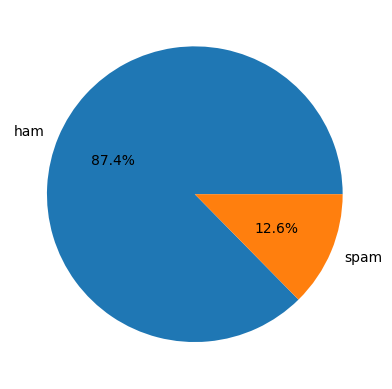

In [785]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), 
        labels=['ham', 'spam'], 
        autopct='%1.1f%%')

plt.show()

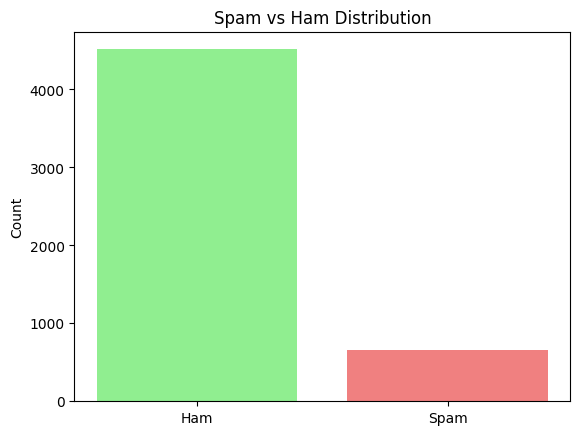

In [786]:
import matplotlib.pyplot as plt

# Get value counts
counts = df['target'].value_counts()

# Create bar chart
plt.bar(['Ham', 'Spam'], counts.values, color=['lightgreen', 'lightcoral'])
plt.ylabel('Count')
plt.title('Spam vs Ham Distribution')
plt.show()

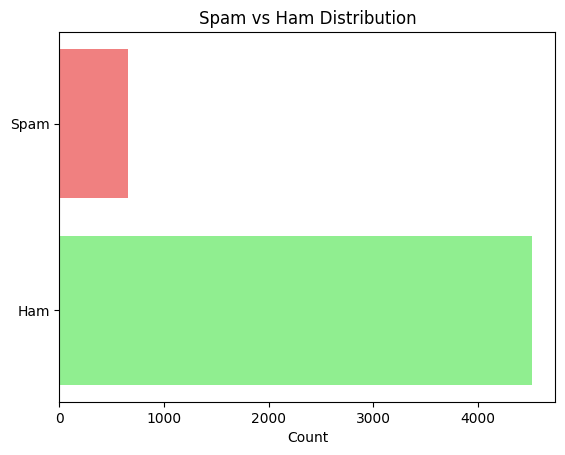

In [787]:
plt.barh(['Ham', 'Spam'], counts.values, color=['lightgreen', 'lightcoral'])
plt.xlabel('Count')
plt.title('Spam vs Ham Distribution')
plt.show()

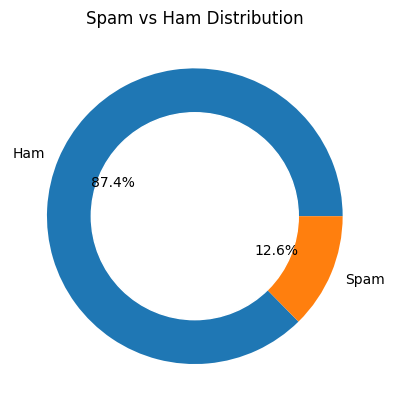

In [788]:
plt.pie(counts.values, labels=['Ham', 'Spam'], autopct='%1.1f%%')
plt.gca().add_artist(plt.Circle((0,0), 0.7, color='white'))  # Makes it a donut
plt.title('Spam vs Ham Distribution')
plt.show()

C:\Users\dibye\AppData\Local\Temp\ipykernel_9132\3838177330.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['target'], palette=['lightgreen', 'lightcoral'])


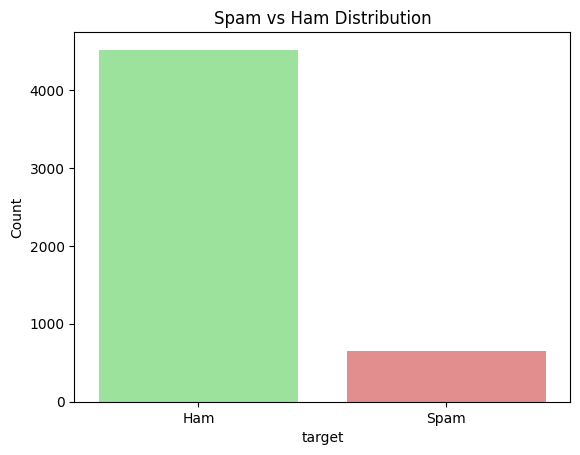

In [789]:
import seaborn as sns

sns.countplot(x=df['target'], palette=['lightgreen', 'lightcoral'])
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.ylabel('Count')
plt.title('Spam vs Ham Distribution')
plt.show()

In [790]:
pip install pywaffle

Note: you may need to restart the kernel to use updated packages.


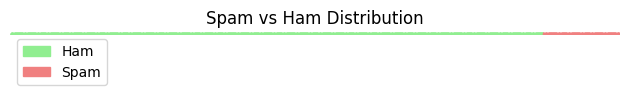

In [791]:
from pywaffle import Waffle

plt.figure(FigureClass=Waffle, 
           rows=5, 
           values=counts.values,
           colors=['lightgreen', 'lightcoral'],
           labels=['Ham', 'Spam'],
           legend={'loc': 'upper left'})
plt.title('Spam vs Ham Distribution')
plt.show()

In [792]:
pip install pywaffle

Note: you may need to restart the kernel to use updated packages.


In [793]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


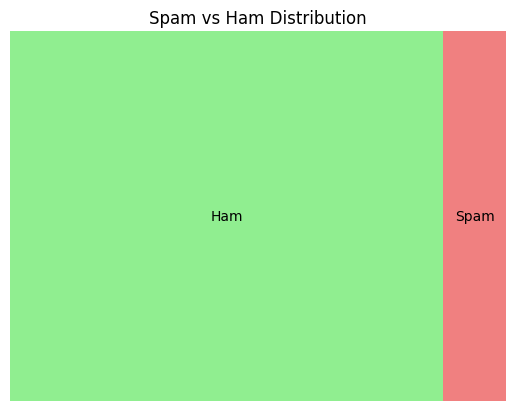

In [794]:
import squarify

squarify.plot(sizes=counts.values, 
              label=['Ham', 'Spam'],
              color=['lightgreen', 'lightcoral'])
plt.axis('off')
plt.title('Spam vs Ham Distribution')
plt.show()

In [795]:
# data is slightly imbalance

In [796]:
# alphabet , words and sentence used in sms

import nltk #natural language toolkit
nltk.download('punkt')           # For tokenization

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dibye\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [797]:
# count no of char
df['num_characters'] = df['text'].apply(len)

In [798]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [799]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dibye\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [800]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dibye\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dibye\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [801]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [802]:
df['text'].apply(lambda x:(nltk.sent_tokenize(x)))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [803]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [804]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [805]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [806]:
# for ham massage
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [807]:
# for spam massage
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

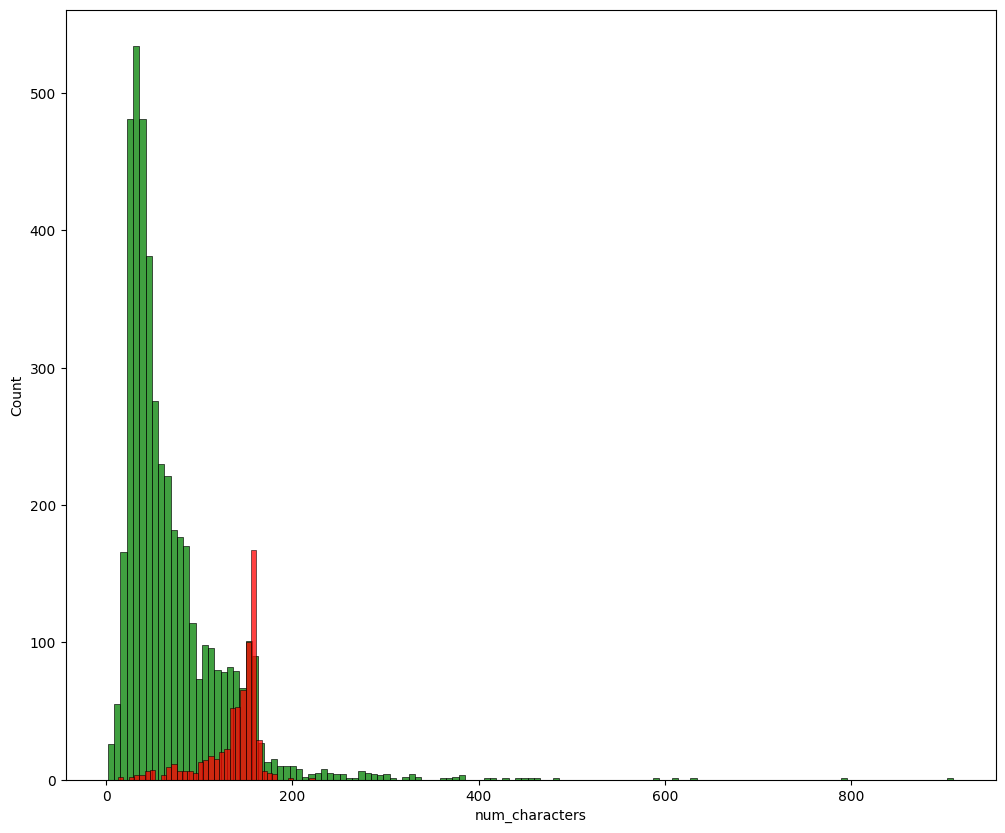

In [808]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.histplot(df[df['target'] == 0]['num_characters'],color='green')
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

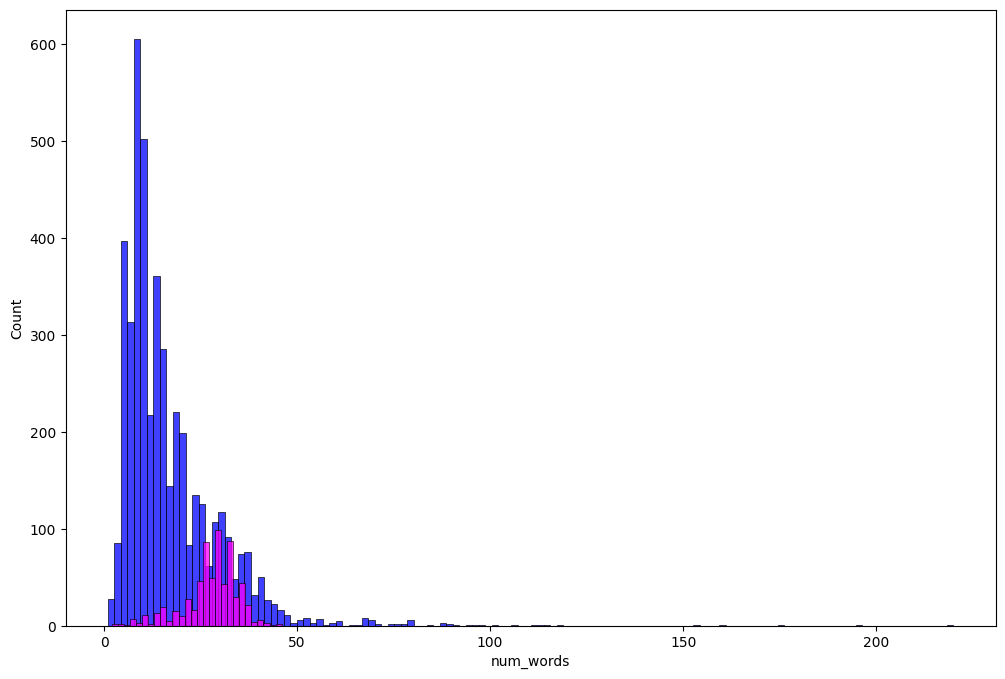

In [809]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_words'],color='blue')
sns.histplot(df[df['target'] == 1]['num_words'],color='magenta')

<Axes: xlabel='num_sentences', ylabel='Count'>

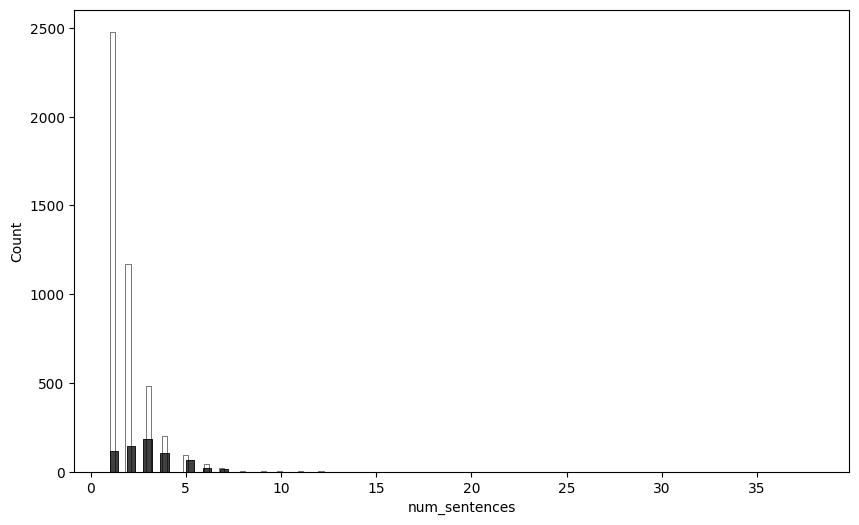

In [810]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(df[df['target'] == 0]['num_sentences'],color='white')
sns.histplot(df[df['target'] == 1]['num_sentences'],color='black')

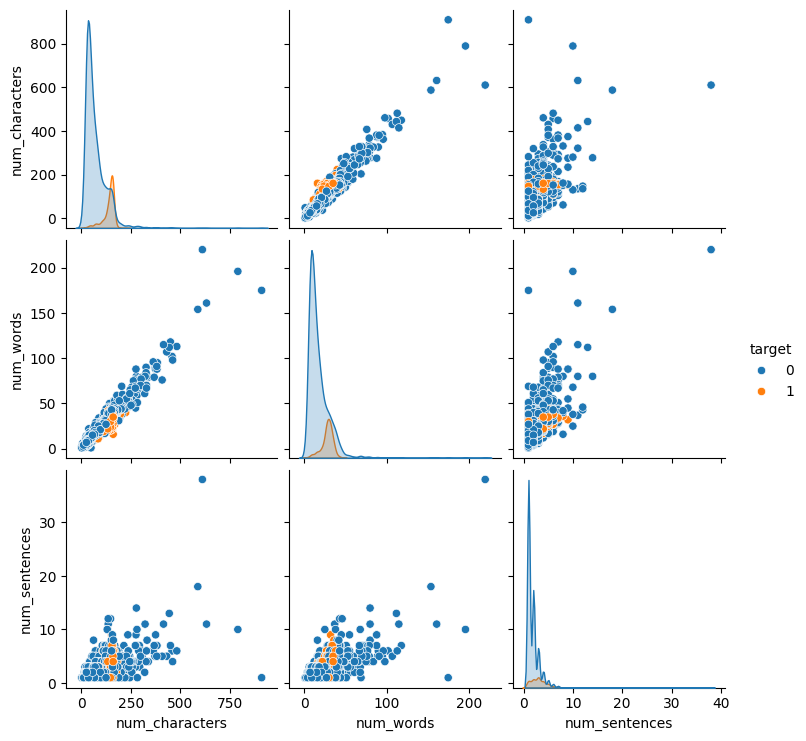

In [811]:
# relation with sentences ,words,cher with each other
sns.pairplot(df,hue='target')

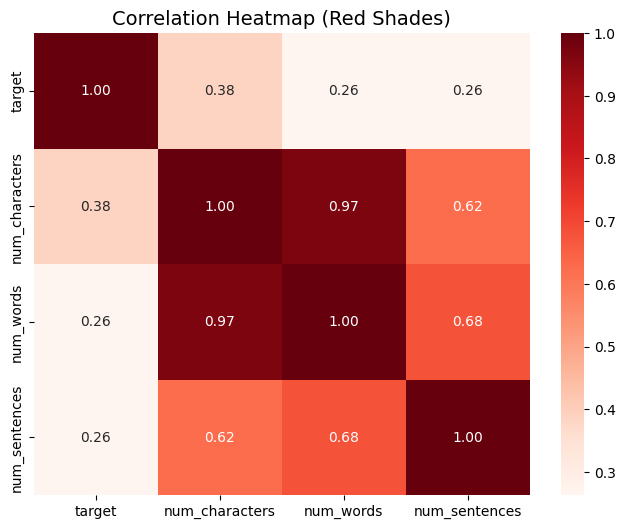

In [812]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation only on numeric columns
corr = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="Reds", fmt=".2f")
plt.title("Correlation Heatmap (Red Shades)", fontsize=14)
plt.show()


# Data preprocessing

In [813]:
# lower case
# tokenization
# removing special char
# removing stop words and punctuation
# lemmatization or stemming

In [814]:
# stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')
print("First 20 English stopwords:")
print(english_stopwords[:20])
print(f"\nTotal English stopwords: {len(english_stopwords)}")

First 20 English stopwords:
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']

Total English stopwords: 198


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dibye\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [815]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [816]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]  
    y = []  
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y = [] 
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y) 
df['text'].apply(transform_text)
df['transformed_text']=df['text'].apply(transform_text)

In [817]:
transform_text('hey !! i am dibyendu .. i loved the yt lectures on agentic ai ..how about you')

'hey dibyendu love yt lectur agent ai'

In [818]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [819]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


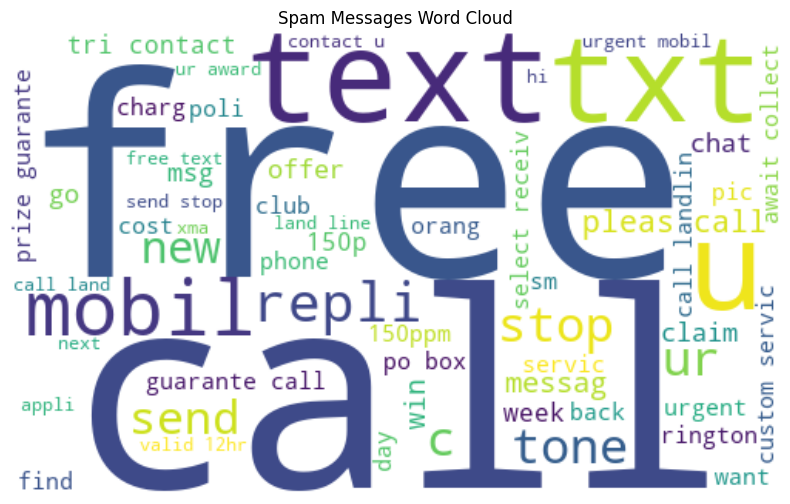

In [820]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(width=500, 
               height=300,
               min_font_size=10,
               background_color='white',
               max_words=100)

# Generate spam word cloud
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

# Display the word cloud
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Spam Messages Word Cloud')
plt.show()

In [821]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

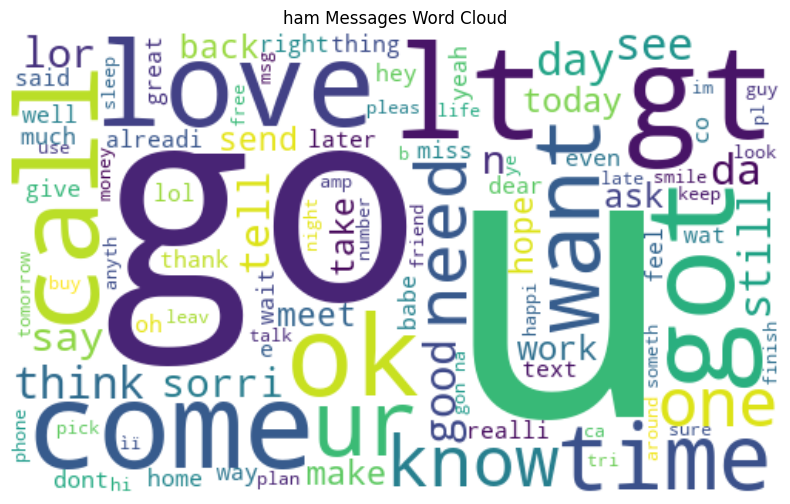

In [822]:
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title('ham Messages Word Cloud')
plt.show()

In [823]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [824]:
spam_corpus=[]
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [825]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [826]:
len(spam_corpus)

9939

C:\Users\dibye\AppData\Local\Temp\ipykernel_9132\3034547252.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=top_spam, ax=axes[0], palette='Reds_r')
C:\Users\dibye\AppData\Local\Temp\ipykernel_9132\3034547252.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=top_ham, ax=axes[1], palette='Blues_r')


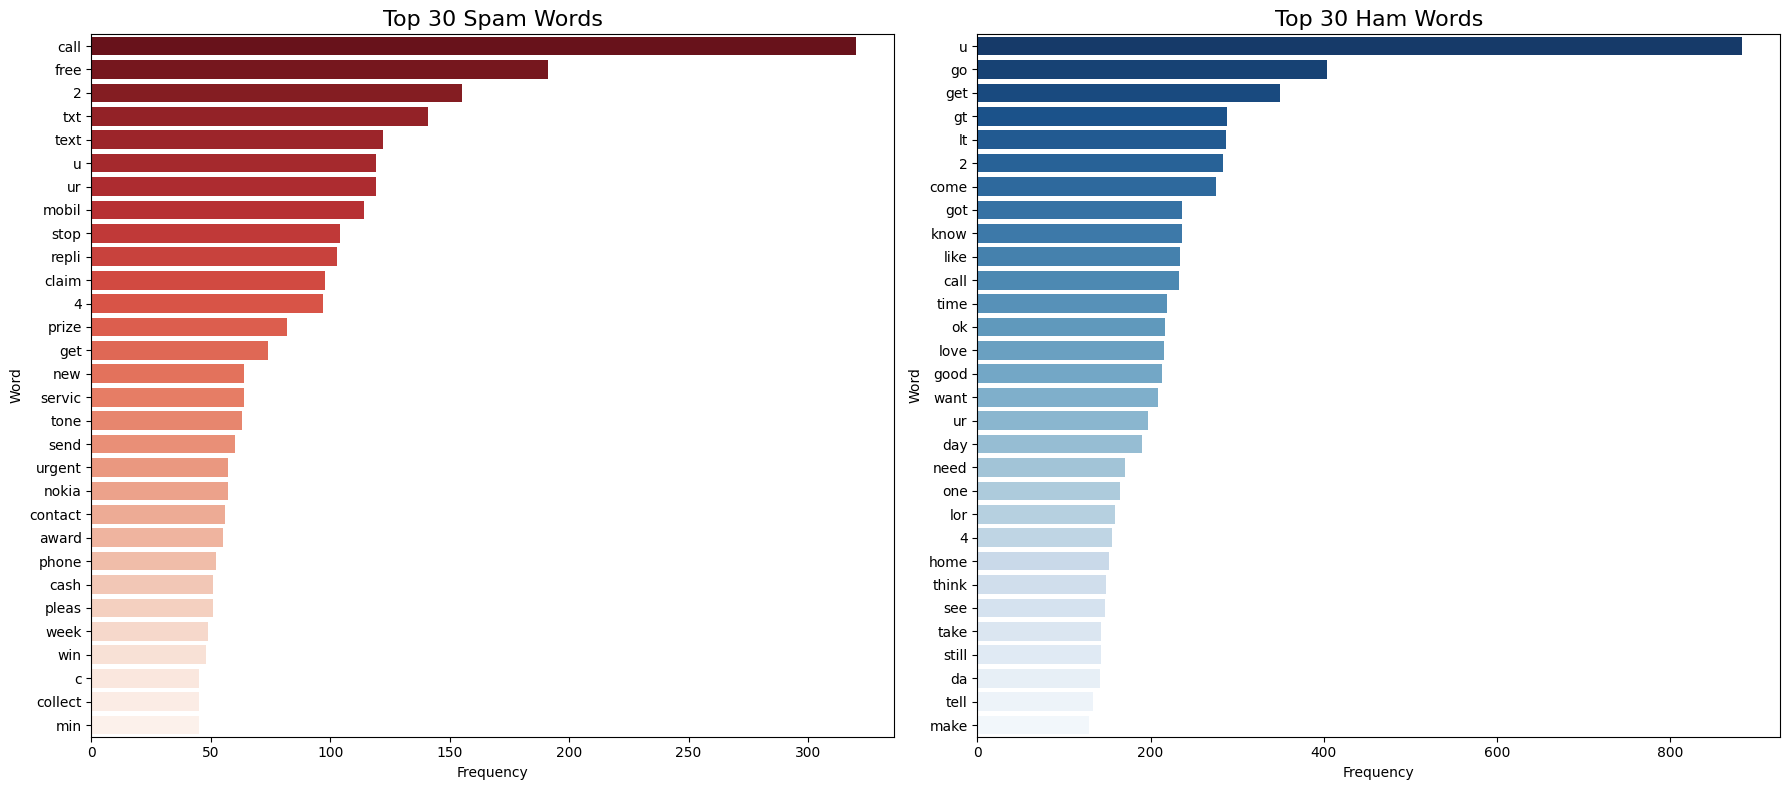

In [827]:
# For spam messages
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text']:
    spam_corpus.extend(msg.split())

# For ham messages  
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text']:
    ham_corpus.extend(msg.split())

# Get top 30 words for spam
top_spam = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])
top_ham = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count'])

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(x='Count', y='Word', data=top_spam, ax=axes[0], palette='Reds_r')
axes[0].set_title('Top 30 Spam Words', fontsize=16)
axes[0].set_xlabel('Frequency')

# Ham words plot
sns.barplot(x='Count', y='Word', data=top_ham, ax=axes[1], palette='Blues_r')
axes[1].set_title('Top 30 Ham Words', fontsize=16)
axes[1].set_xlabel('Frequency')

plt.tight_layout()
plt.show()

C:\Users\dibye\AppData\Local\Temp\ipykernel_9132\534556064.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=spam_df, palette='viridis')


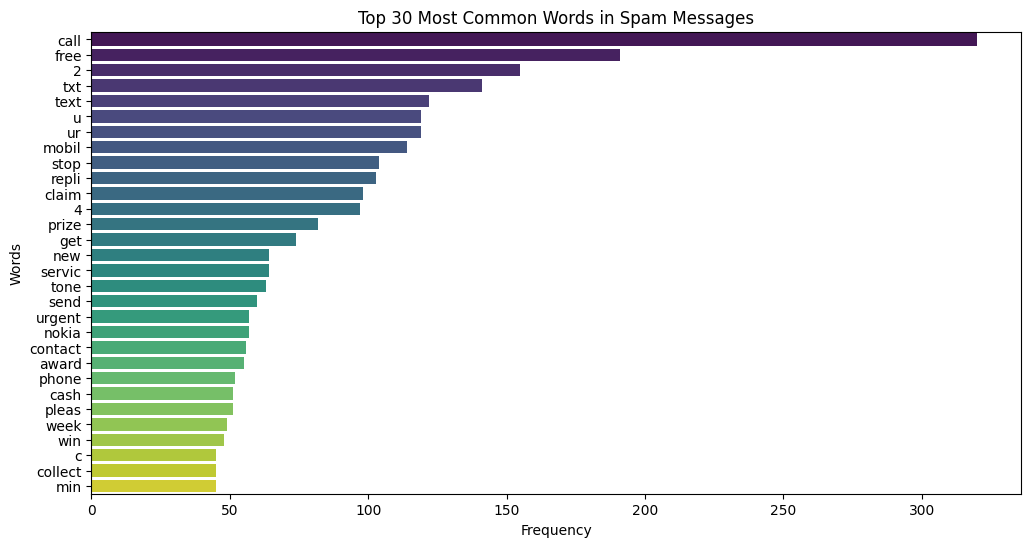

In [828]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


top_spam_words = Counter(spam_corpus).most_common(30)


spam_df = pd.DataFrame(top_spam_words, columns=['Word', 'Count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Word', data=spam_df, palette='viridis')
plt.title('Top 30 Most Common Words in Spam Messages')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

C:\Users\dibye\AppData\Local\Temp\ipykernel_9132\3227756379.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=spam_df, palette='coolwarm')


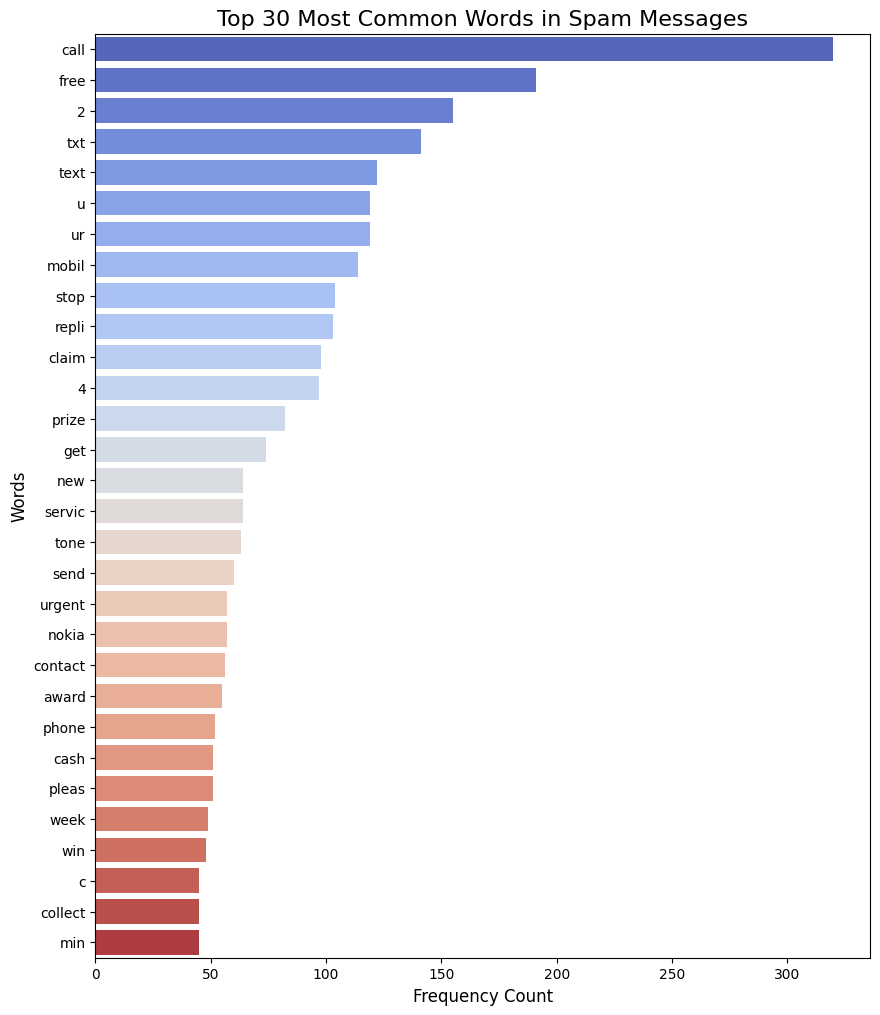

In [829]:
plt.figure(figsize=(10, 12))
sns.barplot(x='Count', y='Word', data=spam_df, palette='coolwarm')
plt.title('Top 30 Most Common Words in Spam Messages', fontsize=16)
plt.xlabel('Frequency Count', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.show()

C:\Users\dibye\AppData\Local\Temp\ipykernel_9132\3417791883.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Count', data=spam_df, palette='viridis')


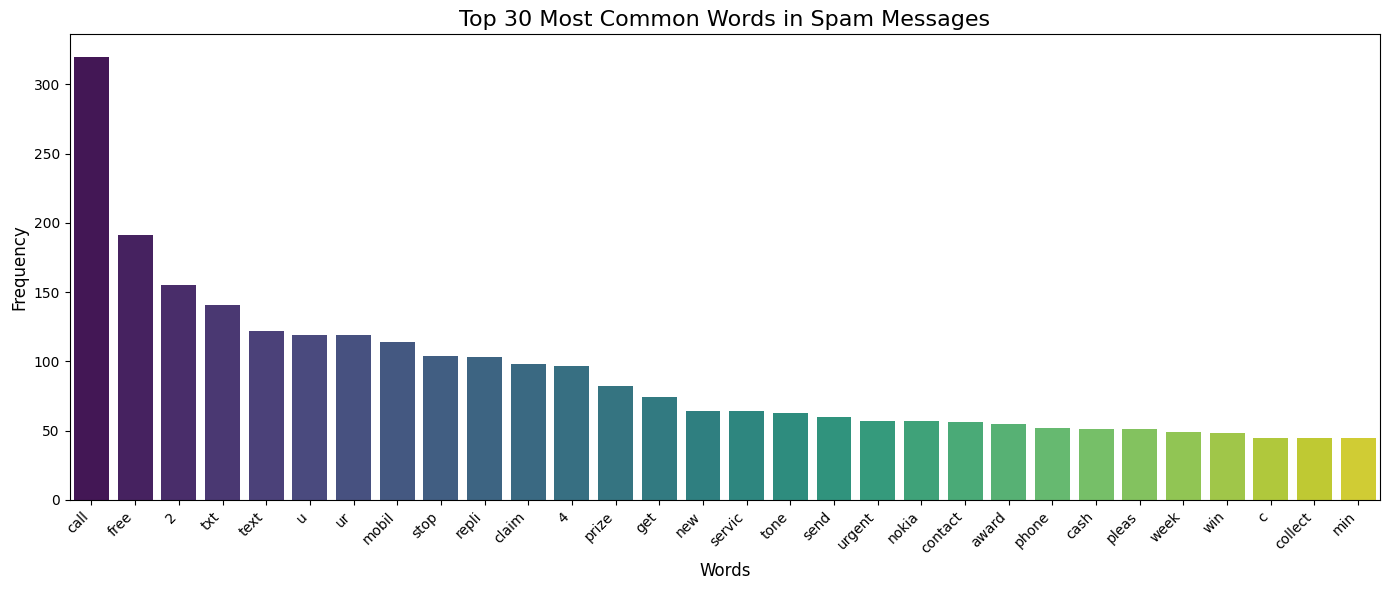

In [830]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


top_spam_words = Counter(spam_corpus).most_common(30)


spam_df = pd.DataFrame(top_spam_words, columns=['Word', 'Count'])


plt.figure(figsize=(14, 6))
sns.barplot(x='Word', y='Count', data=spam_df, palette='viridis')
plt.title('Top 30 Most Common Words in Spam Messages', fontsize=16)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

C:\Users\dibye\AppData\Local\Temp\ipykernel_9132\312803089.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Count', data=top_spam, ax=axes[0], palette='Reds')
C:\Users\dibye\AppData\Local\Temp\ipykernel_9132\312803089.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Count', data=top_ham, ax=axes[1], palette='Blues')


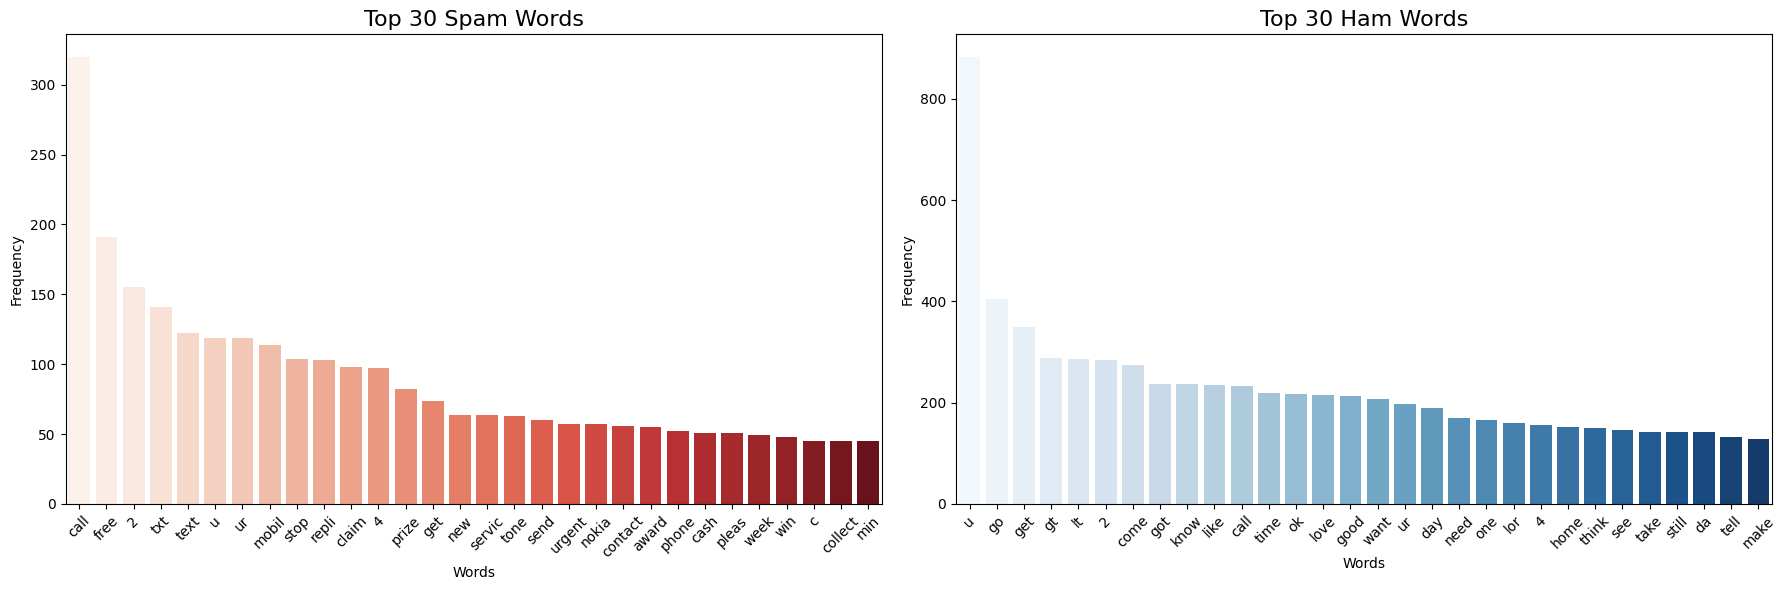

In [831]:

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x='Word', y='Count', data=top_spam, ax=axes[0], palette='Reds')
axes[0].set_title('Top 30 Spam Words', fontsize=16)
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)


sns.barplot(x='Word', y='Count', data=top_ham, ax=axes[1], palette='Blues')
axes[1].set_title('Top 30 Ham Words', fontsize=16)
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

C:\Users\dibye\AppData\Local\Temp\ipykernel_9132\770796070.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Count', data=spam_df_sorted, palette='viridis')


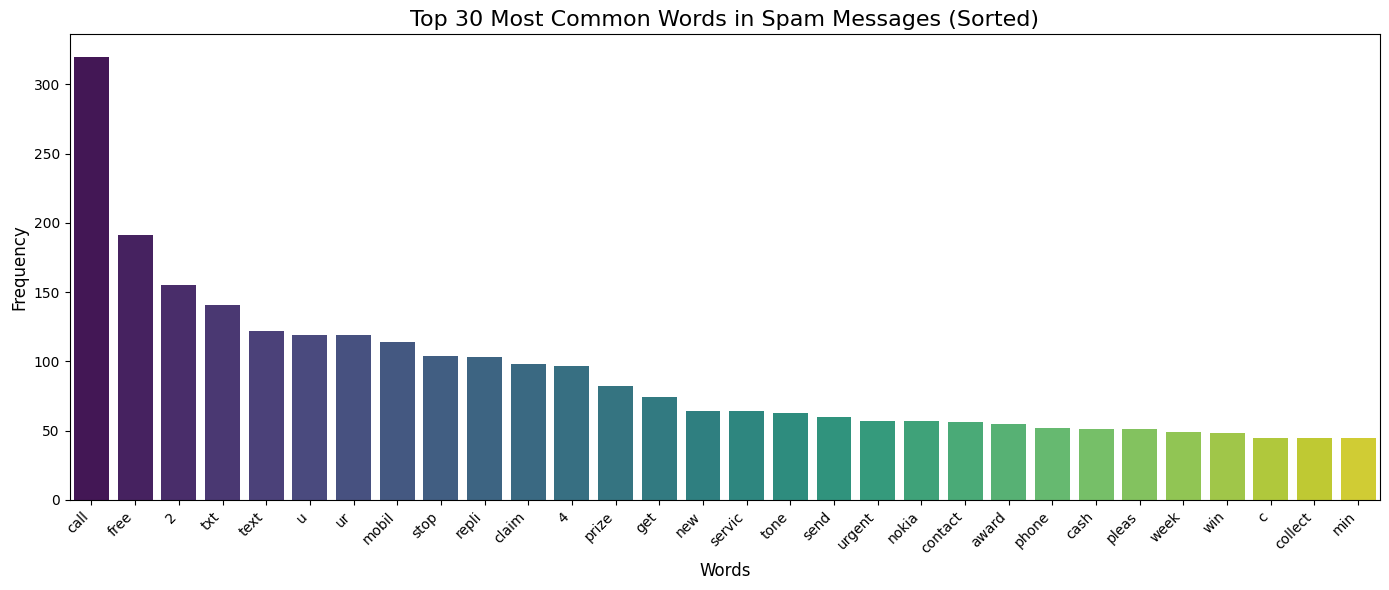

In [832]:

spam_df_sorted = spam_df.sort_values('Count', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x='Word', y='Count', data=spam_df_sorted, palette='viridis')
plt.title('Top 30 Most Common Words in Spam Messages (Sorted)', fontsize=16)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\dibye\AppData\Local\Temp\ipykernel_9132\2013701023.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Count', data=spam_df, palette='viridis')


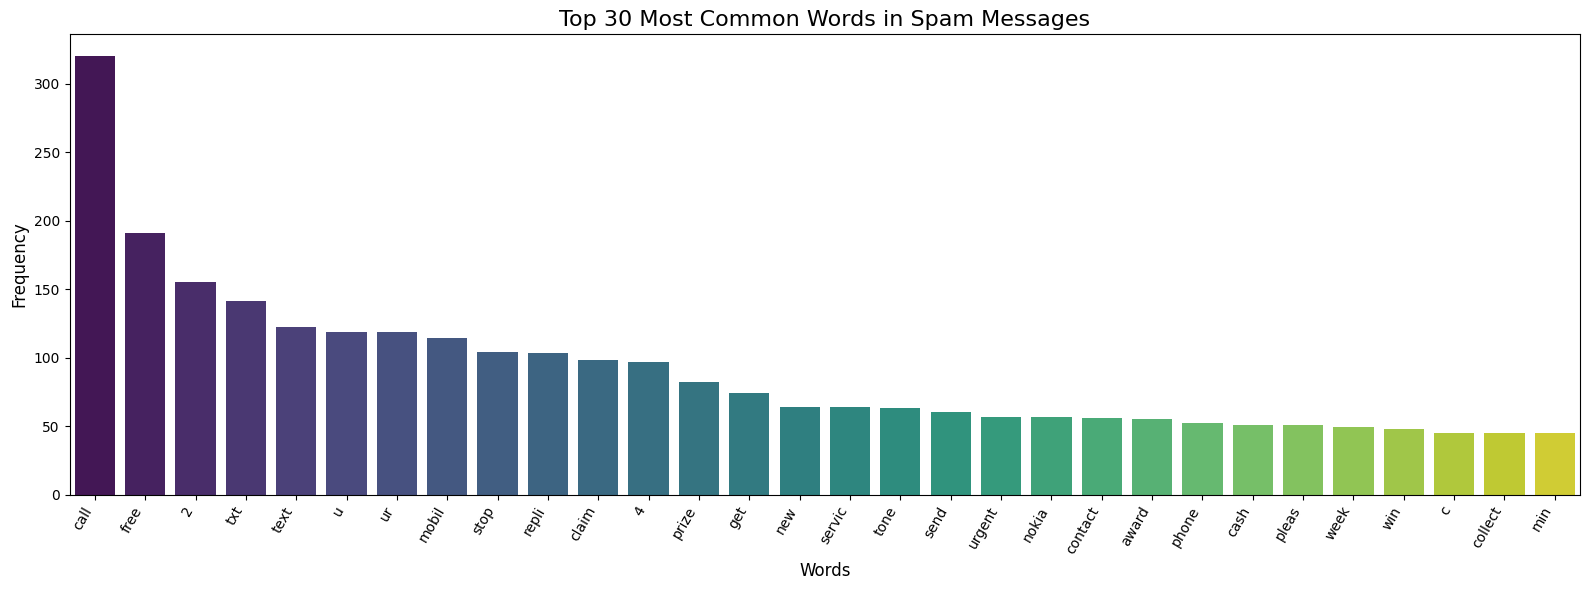

In [833]:
plt.figure(figsize=(16, 6))
sns.barplot(x='Word', y='Count', data=spam_df, palette='viridis')
plt.title('Top 30 Most Common Words in Spam Messages', fontsize=16)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=60, ha='right')  
plt.tight_layout()
plt.show()

In [834]:
len(ham_corpus)

35404

In [835]:
len(spam_corpus)

9939

# EDA ENDS

# MODEL BUILDING

In [836]:
# this is a text specify program we all know that naive bayes algo gives us best accuracy...but we use others also to check

In [837]:
# vectorization --1) bag of word 2)TFIDF 3) word to vec
# bag of words

In [838]:
# vectorization(because input is text form and target is in numeric form ..so by vectorization we need to convert text in numeric )

In [839]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [840]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(df['transformed_text']).toarray()

In [841]:
X.shape

(5169, 6708)

In [842]:
y = df['target'].values

In [843]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

->>Traing and Testing portion

In [844]:
# applying train test split

In [845]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [846]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB
mnb=MultinomialNB
bnb= BernoulliNB

In [847]:
# First, check the shapes and types
print(f"X_train type: {type(X_train)}")
print(f"X_train shape: {X_train.shape}")
print(f"y_train type: {type(y_train)}")
print(f"y_train shape: {y_train.shape}")
print(f"X_train sample:\n{X_train[:5]}")
print(f"y_train sample: {y_train[:5]}")

X_train type: <class 'numpy.ndarray'>
X_train shape: (4135, 6708)
y_train type: <class 'numpy.ndarray'>
y_train shape: (4135,)
X_train sample:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
y_train sample: [0 0 0 0 0]


In [848]:
import numpy as np

# Ensure they are proper arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [849]:
print(f"y_train type: {type(y_train)}")  # lowercase y
print(f"y_train shape: {y_train.shape}")  # lowercase y

y_train type: <class 'numpy.ndarray'>
y_train shape: (4135,)


In [850]:
from sklearn.naive_bayes import GaussianNB

# GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

print("GaussianNB:")
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1))
print()

GaussianNB:
Accuracy: 0.8800773694390716
Confusion Matrix:
 [[792 104]
 [ 20 118]]
Precision: 0.5315315315315315



In [851]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("MultinomialNB:")
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Precision:", precision_score(y_test, y_pred2))

MultinomialNB:
Accuracy: 0.9642166344294004
Confusion Matrix:
 [[871  25]
 [ 12 126]]
Precision: 0.8344370860927153


In [852]:
from sklearn.naive_bayes import BernoulliNB

# BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

print("BernoulliNB:")
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("Precision:", precision_score(y_test, y_pred3))

BernoulliNB:
Accuracy: 0.9700193423597679
Confusion Matrix:
 [[893   3]
 [ 28 110]]
Precision: 0.9734513274336283


---> going to use TFIDF insteed of countvectorizer or bag of words

In [853]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [854]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 6708)

In [855]:
y = df['target'].values

In [856]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [857]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [858]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB
mnb=MultinomialNB
bnb= BernoulliNB

In [859]:
# GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

print("GAUSSIAN NB with TF-IDF:")
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1))
print("\n" + "="*50 + "\n")

# MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

print("MULTINOMIAL NB with TF-IDF:")
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Precision:", precision_score(y_test, y_pred2))
print("\n" + "="*50 + "\n")

# BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

print("BERNOULLI NB with TF-IDF:")
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("Precision:", precision_score(y_test, y_pred3))

GAUSSIAN NB with TF-IDF:
Accuracy: 0.8762088974854932
Confusion Matrix:
 [[793 103]
 [ 25 113]]
Precision: 0.5231481481481481


MULTINOMIAL NB with TF-IDF:
Accuracy: 0.9593810444874274
Confusion Matrix:
 [[896   0]
 [ 42  96]]
Precision: 1.0


BERNOULLI NB with TF-IDF:
Accuracy: 0.9700193423597679
Confusion Matrix:
 [[893   3]
 [ 28 110]]
Precision: 0.9734513274336283


In [860]:
# here data is imbalance so precision is more imp then accuracy so we use mnb insteed of bnb

In [861]:
# use some other machine learning learning models and check the same things

In [862]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [863]:
# training
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [864]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [865]:
clf = {
    'SVC': svc,
    'KNeighbors': knc,
    'MultinomialNB': mnb,
    'DecisionTree': dtc,
    'LogisticRegression': lrc,
    'RandomForest': rfc,
    'AdaBoost': abc,
    'Bagging': bc,
    'ExtraTrees': etc,
    'GradientBoosting': gbdt,
    'XGBoost': xgb
}

In [866]:
from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)  # Use the same parameter name 'clf'
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [867]:
accuracy, precision = train_classifier(svc, X_train, y_train, X_test, y_test)
print(f"SVC - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}")

SVC - Accuracy: 0.9729, Precision: 0.9741


In [868]:
accuracy_scores = []
precision_scores = []

for name, classifier in clf.items():
    current_accuracy, current_precision = train_classifier(classifier, X_train, y_train, X_test, y_test)
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KNeighbors
Accuracy -  0.9003868471953579
Precision -  1.0
For  MultinomialNB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DecisionTree
Accuracy -  0.9342359767891683
Precision -  0.8301886792452831
For  LogisticRegression
Accuracy -  0.9516441005802708
Precision -  0.94
For  RandomForest
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8409090909090909
For  Bagging
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ExtraTrees
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GradientBoosting
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  XGBoost
Accuracy -  0.9748549323017408
Precision -  0.9516129032258065


In [869]:
import pandas as pd
performance_df = pd.DataFrame({
    'Algorithm': list(clf.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
})
print(performance_df)

             Algorithm  Accuracy  Precision
0                  SVC  0.972921   0.974138
1           KNeighbors  0.900387   1.000000
2        MultinomialNB  0.959381   1.000000
3         DecisionTree  0.934236   0.830189
4   LogisticRegression  0.951644   0.940000
5         RandomForest  0.971954   1.000000
6             AdaBoost  0.924565   0.840909
7              Bagging  0.958414   0.862595
8           ExtraTrees  0.972921   0.982456
9     GradientBoosting  0.952611   0.923810
10             XGBoost  0.974855   0.951613


In [870]:
# This will reproduce your exact output format
performance_df = performance_df.sort_values('Accuracy', ascending=False)
print("Sorted by Accuracy:")
print(performance_df.to_string())

Sorted by Accuracy:
             Algorithm  Accuracy  Precision
10             XGBoost  0.974855   0.951613
8           ExtraTrees  0.972921   0.982456
0                  SVC  0.972921   0.974138
5         RandomForest  0.971954   1.000000
2        MultinomialNB  0.959381   1.000000
7              Bagging  0.958414   0.862595
9     GradientBoosting  0.952611   0.923810
4   LogisticRegression  0.951644   0.940000
3         DecisionTree  0.934236   0.830189
6             AdaBoost  0.924565   0.840909
1           KNeighbors  0.900387   1.000000


In [871]:
precision_sorted = performance_df.sort_values('Precision', ascending=False)
print("Sorted by Precision:")
print(precision_sorted.to_string())

Sorted by Precision:
             Algorithm  Accuracy  Precision
1           KNeighbors  0.900387   1.000000
2        MultinomialNB  0.959381   1.000000
5         RandomForest  0.971954   1.000000
8           ExtraTrees  0.972921   0.982456
0                  SVC  0.972921   0.974138
10             XGBoost  0.974855   0.951613
4   LogisticRegression  0.951644   0.940000
9     GradientBoosting  0.952611   0.923810
7              Bagging  0.958414   0.862595
6             AdaBoost  0.924565   0.840909
3         DecisionTree  0.934236   0.830189


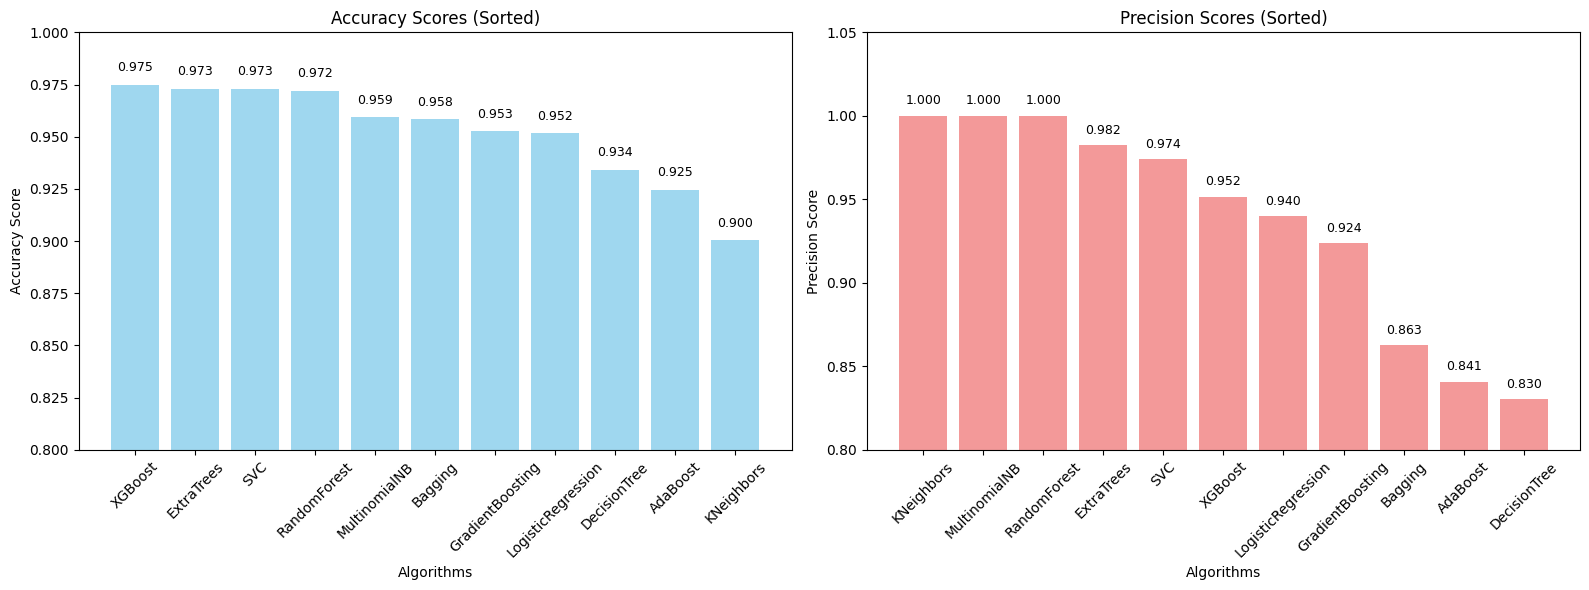

In [872]:
import matplotlib.pyplot as plt
import numpy as np


accuracy_sorted = performance_df.sort_values('Accuracy', ascending=False)
precision_sorted = performance_df.sort_values('Precision', ascending=False)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.bar(accuracy_sorted['Algorithm'], accuracy_sorted['Accuracy'], color='skyblue', alpha=0.8)
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('Accuracy Score')
ax1.set_title('Accuracy Scores (Sorted)')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(0.8, 1.0)


for i, v in enumerate(accuracy_sorted['Accuracy']):
    ax1.text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom', fontsize=9)


ax2.bar(precision_sorted['Algorithm'], precision_sorted['Precision'], color='lightcoral', alpha=0.8)
ax2.set_xlabel('Algorithms')
ax2.set_ylabel('Precision Score')
ax2.set_title('Precision Scores (Sorted)')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(0.8, 1.05)

for i, v in enumerate(precision_sorted['Precision']):
    ax2.text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

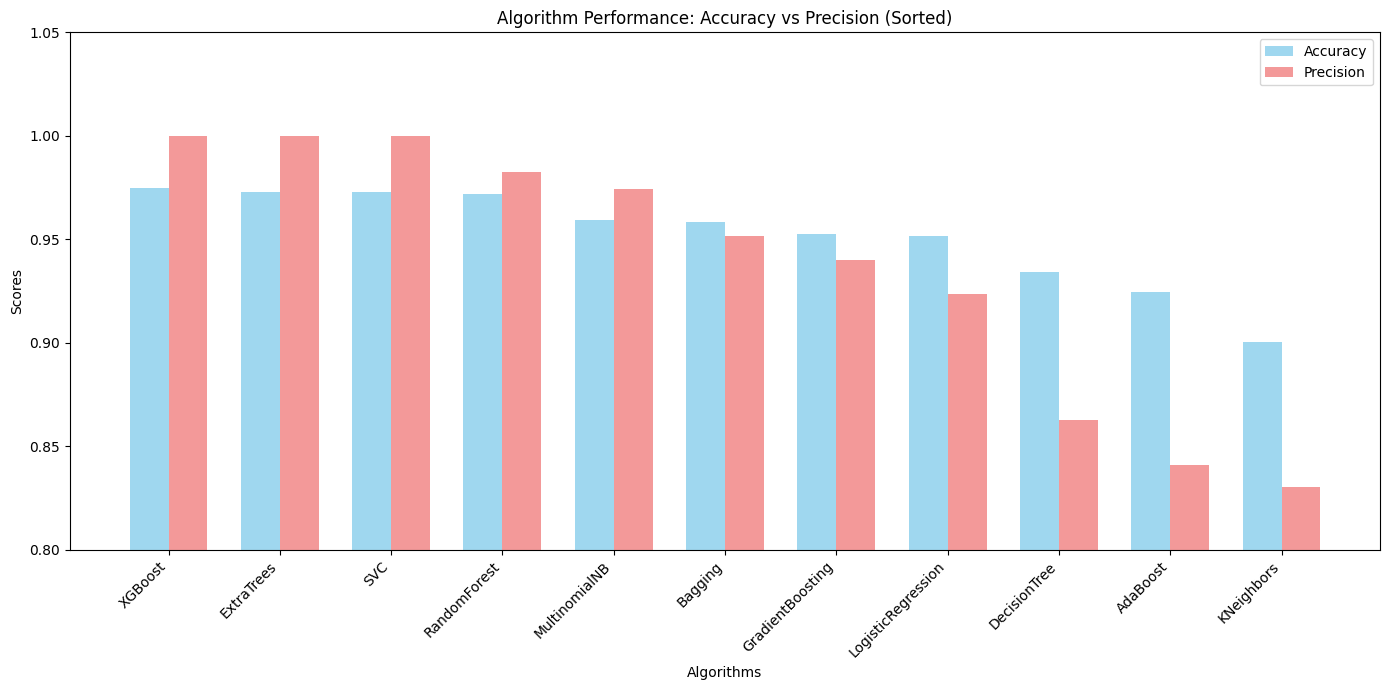

In [873]:
plt.figure(figsize=(14, 7))

x = np.arange(len(performance_df))
width = 0.35

plt.bar(x - width/2, accuracy_sorted['Accuracy'], width, label='Accuracy', color='skyblue', alpha=0.8)
plt.bar(x + width/2, precision_sorted['Precision'], width, label='Precision', color='lightcoral', alpha=0.8)

plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('Algorithm Performance: Accuracy vs Precision (Sorted)')
plt.xticks(x, accuracy_sorted['Algorithm'], rotation=45, ha='right')
plt.legend()
plt.ylim(0.8, 1.05)

plt.tight_layout()
plt.show()

# model improvement

In [874]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
import pandas as pd

# Store previous results
previous_performance = performance_df.copy()
previous_performance = previous_performance.rename(columns={
    'Accuracy': 'Accuracy_Previous', 
    'Precision': 'Precision_Previous'
})

# Initialize TF-IDF with max_features=3000
tfidf = TfidfVectorizer(max_features=3000)

# Transform the text data
X_tfidf = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

# Train-test split
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=2)

# Function to train and evaluate
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

# Train all models with TF-IDF
accuracy_scores_tfidf = []
precision_scores_tfidf = []

for name, classifier in clf.items():
    current_accuracy, current_precision = train_classifier(classifier, X_train_tfidf, y_train, X_test_tfidf, y_test)
    print(f"For {name} with TF-IDF:")
    print(f"Accuracy - {current_accuracy:.6f}")
    print(f"Precision - {current_precision:.6f}")
    print("-" * 40)
    
    accuracy_scores_tfidf.append(current_accuracy)
    precision_scores_tfidf.append(current_precision)

# Create new performance DataFrame
performance_tfidf = pd.DataFrame({
    'Algorithm': list(clf.keys()),
    'Accuracy_TFIDF': accuracy_scores_tfidf,
    'Precision_TFIDF': precision_scores_tfidf
})

# Merge with previous results
comparison_df = pd.merge(previous_performance, performance_tfidf, on='Algorithm')

# Calculate differences
comparison_df['Accuracy_Diff'] = comparison_df['Accuracy_TFIDF'] - comparison_df['Accuracy_Previous']
comparison_df['Precision_Diff'] = comparison_df['Precision_TFIDF'] - comparison_df['Precision_Previous']

# Sort by Accuracy_TFIDF
comparison_df = comparison_df.sort_values('Accuracy_TFIDF', ascending=False)

print("="*80)
print("COMPARISON: Previous vs TF-IDF (max_features=3000)")
print("="*80)
print(comparison_df.to_string())

# Display summary
print("\n" + "="*80)
print("SUMMARY: TF-IDF vs Previous")
print("="*80)
print(f"Average Accuracy Improvement: {comparison_df['Accuracy_Diff'].mean():.6f}")
print(f"Average Precision Improvement: {comparison_df['Precision_Diff'].mean():.6f}")
print(f"Models with improved Accuracy: {(comparison_df['Accuracy_Diff'] > 0).sum()}/{len(comparison_df)}")
print(f"Models with improved Precision: {(comparison_df['Precision_Diff'] > 0).sum()}/{len(comparison_df)}")







For SVC with TF-IDF:
Accuracy - 0.975822
Precision - 0.974790
----------------------------------------
For KNeighbors with TF-IDF:
Accuracy - 0.905222
Precision - 1.000000
----------------------------------------
For MultinomialNB with TF-IDF:
Accuracy - 0.970986
Precision - 1.000000
----------------------------------------
For DecisionTree with TF-IDF:
Accuracy - 0.933269
Precision - 0.841584
----------------------------------------
For LogisticRegression with TF-IDF:
Accuracy - 0.955513
Precision - 0.960000
----------------------------------------
For RandomForest with TF-IDF:
Accuracy - 0.973888
Precision - 0.982609
----------------------------------------
For AdaBoost with TF-IDF:
Accuracy - 0.921663
Precision - 0.820225
----------------------------------------
For Bagging with TF-IDF:
Accuracy - 0.958414
Precision - 0.868217
----------------------------------------
For ExtraTrees with TF-IDF:
Accuracy - 0.974855
Precision - 0.974576
----------------------------------------
For Gra

In [878]:
# First, train with TF-IDF max_features=3000 and get results
tfidf = TfidfVectorizer(max_features=3000)
X_tfidf = tfidf.fit_transform(df['transformed_text']).toarray()
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=2)

# Train and get TF-IDF results
accuracy_scores_tfidf = []
precision_scores_tfidf = []

for name, classifier in clf.items():
    current_accuracy, current_precision = train_classifier(classifier, X_train_tfidf, y_train, X_test_tfidf, y_test)
    accuracy_scores_tfidf.append(current_accuracy)
    precision_scores_tfidf.append(current_precision)

# Create temporary DataFrame for TF-IDF results
temp_df = pd.DataFrame({
    'Algorithm': list(clf.keys()),
    'Accuracy_max_ft_3000': accuracy_scores_tfidf,
    'Precision_max_ft_3000': precision_scores_tfidf
})

# Merge with original performance_df and keep only the required columns
performance_df = performance_df.merge(temp_df, on='Algorithm')

# Display exactly like the image
print(performance_df.to_string())

             Algorithm  Accuracy  Precision  Accuracy_max_ft_3000  Precision_max_ft_3000
0              XGBoost  0.974855   0.951613              0.968085               0.948718
1           ExtraTrees  0.972921   0.982456              0.974855               0.974576
2                  SVC  0.972921   0.974138              0.975822               0.974790
3         RandomForest  0.971954   1.000000              0.973888               0.982609
4        MultinomialNB  0.959381   1.000000              0.970986               1.000000
5              Bagging  0.958414   0.862595              0.958414               0.868217
6     GradientBoosting  0.952611   0.923810              0.950677               0.930693
7   LogisticRegression  0.951644   0.940000              0.955513               0.960000
8         DecisionTree  0.934236   0.830189              0.930368               0.830000
9             AdaBoost  0.924565   0.840909              0.921663               0.820225
10          KNeighbor

In [879]:
import pickle
pickle.dump(tfidf,open('CountVectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
